___
# Ciência dos Dados - PROJETO 1

## Giulia Braga Passarelli

## Informação Nas Regiões

___
## Introdução

O acesso à informação, não só por meio da Internet, tornou-se uma necessidade no mundo atual globalizado. Porém, há diversas áreas do Brasil que não possuem esse benefício, muitas vezes por conta do alto nível de pobreza nas mesmas. Assim, para validar o quanto esse fenômeno afeta no alcance do conhecimento ao redor do país, realizamos a nossa pesquisa.

Esse projeto possui o objetivo de analisar o acesso à informação entre as diferentes regiões do Brasil e a sua relação com a renda domiciliar média de cada região. E, assim, responder a pergunta: Regiões com maior renda domiciliar média possuem maior acesso à informação?

Para isso consideramos a presença de telefones móveis, rádios e televisões em cores como esse acesso. E utilizamos dados da PNAD2015.

___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\gb_pa\Downloads


In [3]:
dados = pd.read_csv('DOM2015.csv',sep=',')

In [4]:
dados2 = dados.loc[:,['UF','V0220','V0225','V0226','V4621']]

In [5]:
dados2.columns = ['UF','Tem Celular','Tem Rádio','Tem Televisão em Cores','RMDpC']

In [6]:
dados2['Tem Celular'] = dados2['Tem Celular'].astype('category')
dados2['Tem Celular'].cat.categories = ('Sim', 'Não')

In [7]:
dados2['Tem Rádio'] = dados2['Tem Rádio'].astype('category')
dados2['Tem Rádio'].cat.categories = ('Sim', 'Não')

In [8]:
dados2['Tem Televisão em Cores'] = dados2['Tem Televisão em Cores'].astype('category')
dados2['Tem Televisão em Cores'].cat.categories = ('Sim', 'Não')

In [9]:
dados3 = dados2.dropna(how='any')

## Na primeira parte construímos o dataset apresentado abaixo, removendo as linhas que não possuíam algum dado. Consideramos 'RMDpC' a renda mensal per capita

In [10]:
dados3.head()

,UF,Tem Celular,Tem Rádio,Tem Televisão em Cores,RMDpC
0,11,Sim,Não,Sim,800.0
2,11,Sim,Não,Não,1150.0
3,11,Sim,Sim,Sim,793.0
4,11,Sim,Sim,Não,2900.0
5,11,Não,Sim,Sim,1990.0


## A seguir iremos agrupar as pessoas das mesmas regiões em uma nova coluna do dataset

In [11]:
dados3['UF'] = dados3['UF'].astype('int')

C:\Users\gb_pa\Documents\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
def funcao(dados3):
    if dados3.UF >=11 and dados3.UF <= 17:
        return 'Norte'
    if dados3.UF >=20 and dados3.UF <= 29:
        return 'NE'
    if dados3.UF >=30 and dados3.UF <= 35:
        return 'SE'
    if dados3.UF >=40 and dados3.UF <= 43:
        return 'Sul'
    if dados3.UF >=50 and dados3.UF <= 53:
        return 'CO'

dados3['Regiao'] = dados3.apply(funcao, axis=1)

C:\Users\gb_pa\Documents\Anaconda\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
dados3.Regiao = dados3.Regiao.astype('category')

C:\Users\gb_pa\Documents\Anaconda\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


## Feito isso, separamos as rendas em 5 faixas e as analisamos para as diferentes regiões

In [14]:
def faixas(dados3):
    x=dados3['RMDpC']
    if x<250: 
        return 1
    elif x<500: 
        return 2
    elif x<750: 
        return 3
    elif x<1000: 
        return 4
    return 10
renda = dados3.apply(faixas,axis=1)
dados3['renda'] = renda
dados3.renda = dados3.renda.astype('category')
dados3.renda.cat.categories=(['250','500','750','1000','+1000'])

C:\Users\gb_pa\Documents\Anaconda\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\gb_pa\Documents\Anaconda\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


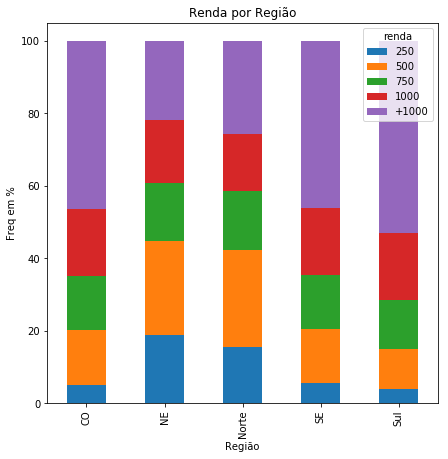

In [15]:
grafico1 = pd.crosstab(dados3['Regiao'],dados3['renda'],normalize='index')
grafico1 = (grafico1 *100)

grafico1.plot(kind='bar',stacked='True',title='Renda por Região',figsize=(7,7))
plt.xlabel('Região')
plt.ylabel('Freq em %')

## Analisando esse gráfico concluímos que, quanto mais deslocado para baixo está o gráfico, maior é a renda mensal média na região. Assim, a região sul apresenta o maior desse valor, seguido pelas regiões sudeste e centro-oeste, empatadas, o norte e, por último, o nordeste

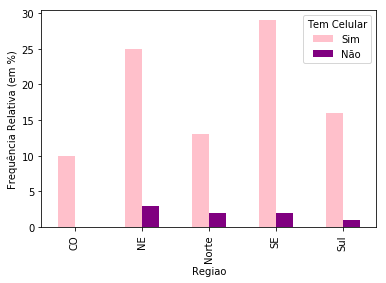

In [16]:
ct1 = pd.crosstab(dados3['Regiao'], dados3['Tem Celular'])
ct1 = (ct1/ct1.sum().sum()*100).round(decimals=0)
ct1.plot(kind='bar', color=('pink', 'purple'))
plt.ylabel('Frequência Relativa (em %)')

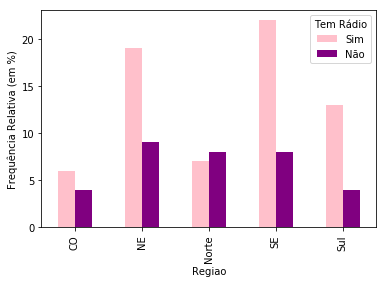

In [17]:
ct2 = pd.crosstab(dados3['Regiao'], dados3['Tem Rádio'])
ct2 = (ct2/ct2.sum().sum()*100).round(decimals=0)
ct2.plot(kind='bar', color=('pink', 'purple'))
plt.ylabel('Frequência Relativa (em %)')

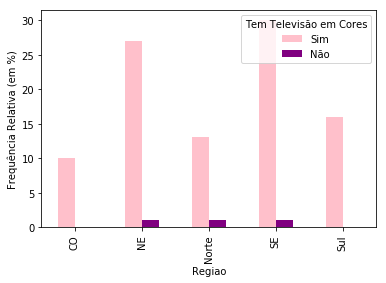

In [18]:
ct3 = pd.crosstab(dados3['Regiao'], dados3['Tem Televisão em Cores'])
ct3 = (ct3/ct3.sum().sum()*100).round(decimals=0)
ct3.plot(kind='bar', color=('pink', 'purple'))
plt.ylabel('Frequência Relativa (em %)')

## Fazendo uma análise geral das variáveis utilizadas, percebemos que a proporção de "Sim" se mantém alta para o sudeste e nordeste e baixa para o nordeste. Porém essa análise não leva em conta a maior densidade demográfica nas primeiras regiões, e baixa na última. Assim, faremos uma análise mais apropriada a seguir

## Consideraremos o acesso à informação como sendo a adição de objetos que a pessoa possui entre celular, rádio e televisão em cores. Quanto maior esse número, maior será o seu acesso

In [19]:
def acesso(dados3):
    a = 0
    if dados3['Tem Celular'] == "Sim":
        a +=1
    if dados3['Tem Rádio'] == "Sim":
        a +=1
    if dados3['Tem Televisão em Cores'] == "Sim":
        a +=1
    return a

dados3['Acesso'] = dados3.apply(acesso, axis=1)

C:\Users\gb_pa\Documents\Anaconda\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


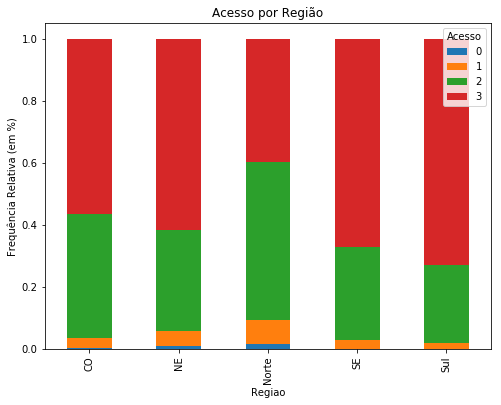

In [20]:
grafico2 = pd.crosstab(dados3['Regiao'], dados3['Acesso'],normalize='index')
grafico2.plot(kind='bar', stacked='True',title='Acesso por Região',figsize=(8,6))
plt.ylabel('Frequência Relativa (em %)')

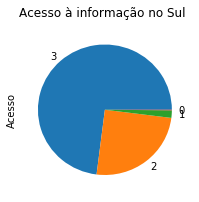

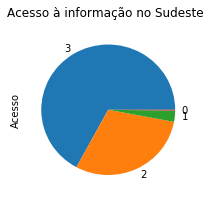

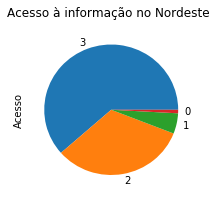

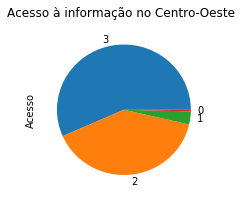

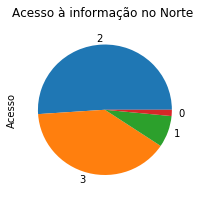

In [21]:
co = dados3[dados3['Regiao'].isin(['CO'])]
ne = dados3[dados3['Regiao'].isin(['NE'])]
no = dados3[dados3['Regiao'].isin(['Norte'])]
se = dados3[dados3['Regiao'].isin(['SE'])]
su = dados3[dados3['Regiao'].isin(['Sul'])]

su2 = su.iloc[:,[7]]
su3 = su2['Acesso'].value_counts()
plot = su3.plot(kind='pie',subplots=True,figsize=(3, 3),title='Acesso à informação no Sul')
plt.show()

se2 = se.iloc[:,[7]]
se3 = se2['Acesso'].value_counts()
plot = se3.plot(kind='pie',subplots=True,figsize=(3, 3),title='Acesso à informação no Sudeste')
plt.show()

ne2 = ne.iloc[:,[7]]
ne3 = ne2['Acesso'].value_counts()
plot = ne3.plot(kind='pie',subplots=True,figsize=(3, 3),title='Acesso à informação no Nordeste')
plt.show()

co2 = co.iloc[:,[7]]
co3 = co2['Acesso'].value_counts()
plot = co3.plot(kind='pie',subplots=True,figsize=(3, 3),title='Acesso à informação no Centro-Oeste')
plt.show()

no2 = no.iloc[:,[7]]
no3 = no2['Acesso'].value_counts()
plot = no3.plot(kind='pie',subplots=True,figsize=(3, 3),title='Acesso à informação no Norte')
plt.show()

## Os gráficos acima indicam a ordem das regiões quando se trata de acesso à informação (em porcentagem de usuários por regiãao), sendo essa: Sul, Sudeste, Nordeste, Centro-Oeste e Norte. E, assim, notamos a semelhança nessa ordem com a do gráfico de renda, apesar do Centro-Oeste ter sido ultrapassado pelo Nordeste nesses gráficos

## Para analisarmos melhor o nosso problema, consideramos uma faixa de renda maior e verificamos se a renda mensal domiciliar realmente inffluencia no acesso à informação

In [22]:
#Acesso por renda
def faixas_novas(dados3):
    x=dados3['RMDpC']
    if x<100: return 1
    elif x<200: return 2
    elif x<300: return 3
    elif x<400: return 4
    elif x<500: return 5
    elif x<600: return 6
    elif x<700: return 7
    elif x<800: return 8
    elif x<900: return 9
    elif x<1000: return 10
    return 11
renda_nova = dados3.apply(faixas_novas,axis=1)
dados3['renda_nova'] = renda_nova
dados3.renda_nova = dados3.renda_nova.astype('category')
dados3.renda_nova.cat.categories=(['100','200','300','400','500','600','700','800','900','1000','+1000'])

C:\Users\gb_pa\Documents\Anaconda\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\gb_pa\Documents\Anaconda\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


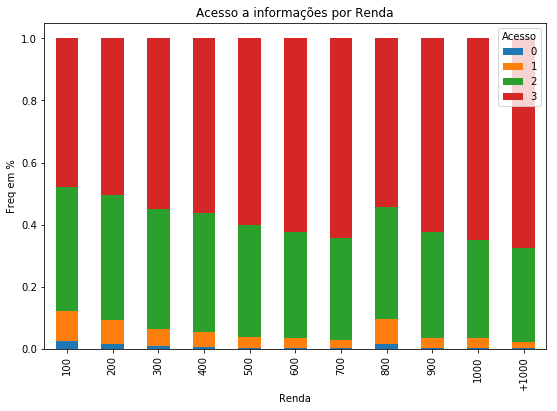

In [23]:
ph = pd.crosstab(dados3['renda_nova'],dados3['Acesso'],normalize='index')
ph.plot(kind='bar',stacked='True',legend=['Sim','Nao'],title='Acesso a informações por Renda',figsize=(9,6))
plt.ylabel('Freq em %')
plt.xlabel('Renda')

## Pelo gráfico acima notamos que, apesar da diferença ser sútil, o acesso realmente aumenta conforme a renda aumenta

___
# Conclusão 

## A pesquisa comprova que as regiões sul, sudeste e centro-oeste, norte, nordeste, apresentam ordem decrescente de renda domiciliar mensal per capita e, de modo análogo as mesmas regiões (com excessão do centro-oeste que ficou atrás do nordeste) apresentaram ordem decrescente de acesso à informação. Assim, demonstra-se uma relação entre os dois fatores

In [24]:
dados3.to_csv('P1-final.csv')